In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv("clust_data.csv")

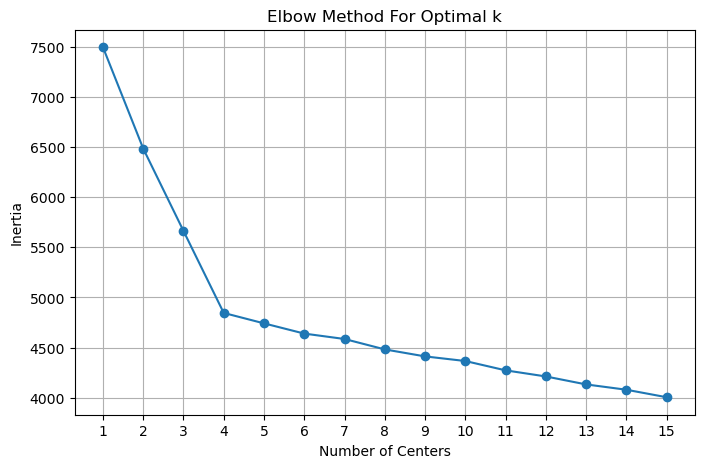

In [8]:
inertia_values = []
k_values = range(1, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Centers')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [10]:
optimal_k = 4;
print("The elbow is 4 and I think 4 should be used for this data")

The elbow is 4 and I think 4 should be used for this data


In [13]:
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans_optimal.fit(data)
labels = kmeans_optimal.labels_
data['Cluster'] = labels

In [14]:
cluster_counts = data['Cluster'].value_counts().sort_index()
print('Number of observations in each cluster:')
for i in range(optimal_k):
    print(f'Cluster {i + 1}: {cluster_counts[i]} observations')
print(f'\nInertia: {kmeans_optimal.inertia_:.2f}')

Number of observations in each cluster:
Cluster 1: 25 observations
Cluster 2: 25 observations
Cluster 3: 25 observations
Cluster 4: 25 observations

Inertia: 4844.93


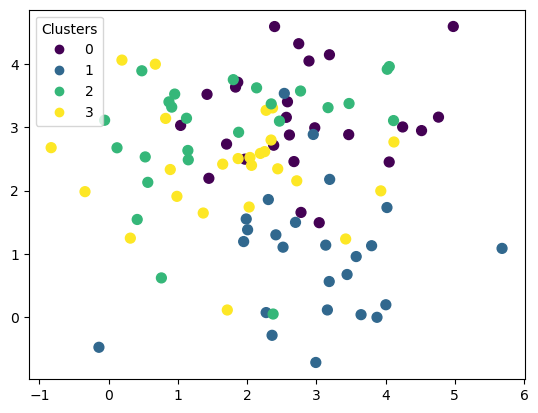

In [20]:
plt.figure()
scatter = plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()